Реализация алгоритма случайного леса, для решения задачи классификации на примере датасета Иирисов Фишера.

N_ESTIMATORS, MAX_DEPTH, SUBSPACE_DIM - гиперпараметры, на которых алгоритм получает наилучшее качество (с точки зрения метрики accuracy, доли правильных ответов) на тестовой выборке с параметром `test_size`=0.3.


In [210]:
import numpy as np
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)

class sample(object):
  def __init__(self, X, n_subspace):
    self.idx_subspace = self.random_subspace(X, n_subspace)
  
  def __call__(self, X, y):
    idx_obj = self.bootstrap_sample(X)
    X_sampled, y_sampled = self.get_subsample(X, y, self.idx_subspace, idx_obj)
    return X_sampled, y_sampled

  @staticmethod
  def bootstrap_sample(X, random_state=42):

    return np.unique(np.random.choice(len(X), size = len(X)))
 
  @staticmethod
  def random_subspace(X, n_subspace, random_state=42):

    return np.unique(np.random.choice(len(X[0]), size = n_subspace, replace = False))

  @staticmethod
  def get_subsample(X, y, idx_subspace, idx_obj):

    x_sampled = []
    y_sampled = []
    for idx_o in idx_obj:
      y_sampled.append(y[idx_o])
      x_temp = []
      for idx_ss in idx_subspace:
        x_temp.append(X[idx_o][idx_ss])
      x_sampled.append(x_temp)

    return np.array(x_sampled), np.array(y_sampled)

N_ESTIMATORS = 10
MAX_DEPTH = 5
SUBSPACE_DIM = 3

class random_forest(object):
  def __init__(self, n_estimators: int, max_depth: int, subspaces_dim: int, random_state: int):
    self.n_estimators = n_estimators
    self.max_depth = max_depth
    self.subspaces_dim = subspaces_dim
    self.random_state = random_state
    self._estimators = []
    self.subspace_idx = []

  def fit(self, X, y):
    for i in range(self.n_estimators):

      s = sample(X, self.subspaces_dim)
      bootstrap_indices = s.bootstrap_sample(X)
      self.subspace_idx.append(s.idx_subspace)
      X_sampled, y_sampled = s.get_subsample(X, y, s.idx_subspace, bootstrap_indices)
      
      tree = DecisionTreeClassifier(criterion = "gini", random_state = self.random_state)
      tree.fit(X_sampled, y_sampled)
      self._estimators.append(tree)


  def predict(self, X):

    preds = []
    for i in range(len(self._estimators)):
      preds.append(self._estimators[i].predict(X[:, self.subspace_idx[i]]))
    trans_preds = np.asarray(preds).transpose()

    preds = []
    for el in trans_preds:
      preds.append(Counter(el).most_common(1)[0][0])

    preds = np.asarray(preds).transpose()

    return preds

In [211]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X, y = load_iris(return_X_y=True)

In [212]:
X_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

In [213]:
rand_forst = random_forest(2, 5, 2, 42)
rand_forst.fit(X_train, y_train)

In [161]:
tree = DecisionTreeClassifier(criterion = "gini")
tree.fit(X_train, y_train)
preds = tree.predict(x_test)

In [214]:
preds = rand_forst.predict(x_test)
preds

array([1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2,
       0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0,
       0])

In [215]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [164]:
accuracy_score(y_test, preds)

0.9555555555555556

In [198]:
X_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
rand_forst = random_forest(10, 5, 3, 42)
rand_forst.fit(X_train, y_train)
accuracy_score(y_test,tree.predict(x_test))


1.0

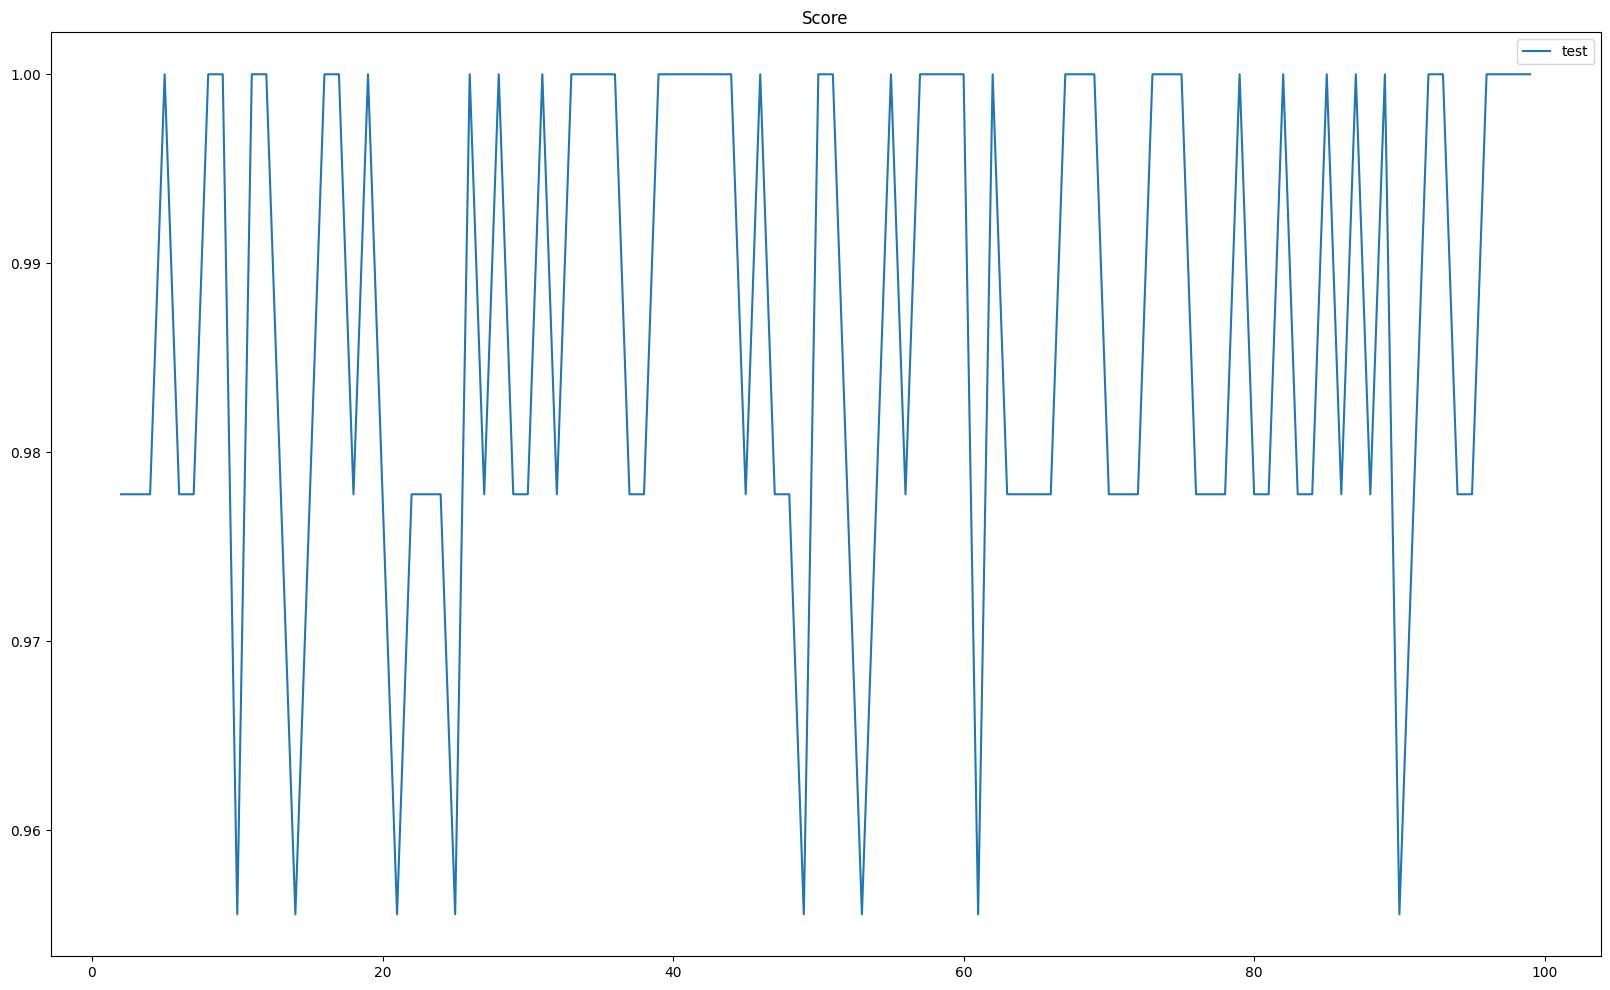

In [183]:
from matplotlib import pyplot as plt

plt.figure(figsize = (20,12))
plt.title('Score')
x = np.arange(2, 100)
plt.plot(x, acc, label='test')

plt.legend()